In [ ]:
#feature engeneering and pre-processing


In [23]:
# Basic Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [18]:
data = files.upload()

Saving uncleaned data set.csv to uncleaned data set (2).csv


In [26]:
df = pd.read_csv('movies.csv', encoding='latin1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [27]:
print("missing values per column:")
print(df.isnull().sum())


missing values per column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [29]:
df.dropna(subset=['Rating','Year','Duration'], inplace=True)
print("missing values after dropping rows:")
print(df.isnull().sum())

missing values after dropping rows:
Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [31]:
df.drop_duplicates(inplace=True)
print("missing values after removing duplicates:")
print(df.isnull().sum())

missing values after removing duplicates:
Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [32]:
# Clean and convert 'Year' to numeric
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Clean and convert 'Duration' to numeric
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False).astype(int)

# Clean and convert 'Votes' to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=False).astype(int)

print("✅ Data types cleaned for 'Year', 'Duration', and 'Votes'.")
display(df.info())

✅ Data types cleaned for 'Year', 'Duration', and 'Votes'.
<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.8+ KB


None

In [33]:
print("desprective statistics of numerical columns:")
df.describe()

desprective statistics of numerical columns:


,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


from matplotlib import pyplot as plt
_df_4['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_15['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_31['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='Year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='Duration', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='Rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='Votes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

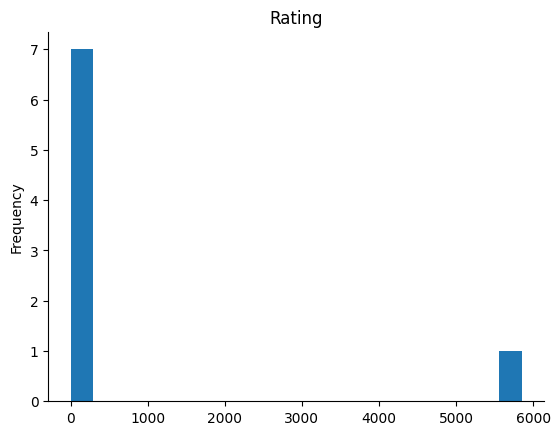

In [36]:
from matplotlib import pyplot as plt
_df_21['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

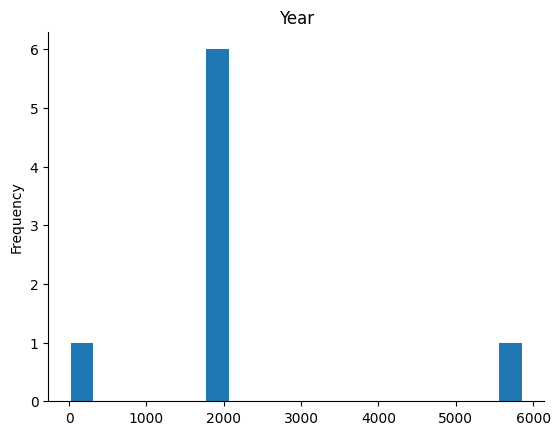

In [37]:
from matplotlib import pyplot as plt
_df_19['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

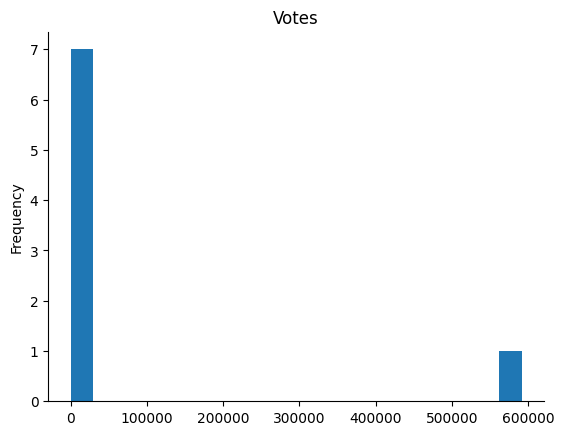

In [38]:
from matplotlib import pyplot as plt
_df_7['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#DATA PREPROCESSING

In [44]:
# Handle 'Genre' column: split the string and apply one-hot encoding
if 'Genre' in df.columns:
    # Split genres and get unique genres
    genres = df['Genre'].str.split(',', expand=True).stack()
    unique_genres = genres.str.strip().unique()
    print(f"✅ Found {len(unique_genres)} unique genres.")

    # Create dummy variables for each genre
    genre_dummies = df['Genre'].str.get_dummies(sep=',')

    # Merge the dummy variables back to the original DataFrame
    df = pd.concat([df, genre_dummies], axis=1)

    # Drop the original 'Genre' column
    df.drop('Genre', axis=1, inplace=True)
    print("✅ 'Genre' column processed and one-hot encoded.")
else:
    print("ℹ️ 'Genre' column not found in the DataFrame.")

display(df.head())
display(df.info())

ℹ️ 'Genre' column not found in the DataFrame.


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,'Action',...,['Mystery',['Mystery'],['Romance',['Romance'],['Sci-Fi',['Sci-Fi'],['Sport'],['Thriller',['Thriller'],['War']
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5851 non-null   object 
 1   Year             5851 non-null   int64  
 2   Duration         5851 non-null   int64  
 3   Rating           5851 non-null   float64
 4   Votes            5851 non-null   int64  
 5   Director         5850 non-null   object 
 6   Actor 1          5776 non-null   object 
 7   Actor 2          5734 non-null   object 
 8   Actor 3          5688 non-null   object 
 9   'Action'         5851 non-null   int64  
 10  'Action']        5851 non-null   int64  
 11  'Adventure'      5851 non-null   int64  
 12  'Adventure']     5851 non-null   int64  
 13  'Biography'      5851 non-null   int64  
 14  'Biography']     5851 non-null   int64  
 15  'Comedy'         5851 non-null   int64  
 16  'Comedy']        5851 non-null   int64  
 17  'Crime'          5

None

In [51]:
# Define features (X) and target (y)
# Exclude 'Name' and 'Rating'
X = df.drop(['Name', 'Rating'], axis=1)
y = df['Rating']

print("✅ Features (X) and target (y) defined.")
print("\nFeatures (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

✅ Features (X) and target (y) defined.

Features (X) head:


,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,'Action','Action'],'Adventure',...,['Mystery',['Mystery'],['Romance',['Romance'],['Sci-Fi',['Sci-Fi'],['Sport'],['Thriller',['Thriller'],['War']
1,2019,109,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,110,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,147,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2005,142,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2012,82,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Target (y) head:


,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6


In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

✅ Data split into training and testing sets.
Training set shape: (4680, 81)
Testing set shape: (1171, 81)


In [55]:
# Model Selection and Training

# Import Linear Regression model (already imported in NAMZ5rpsKG99)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np # Import numpy for dtypes

# Identify categorical columns for one-hot encoding
categorical_features = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Identify numerical columns (including the already one-hot encoded genres)
# Exclude the categorical features we will explicitly encode
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]


# Create a ColumnTransformer to apply OneHotEncoder to specified categorical features
# and pass through numerical features (including the already encoded genres)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop' # Drop columns not specified in transformers
)

# Create a pipeline that first preprocesses the data and then trains the Linear Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Train the model
model_pipeline.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully after One-Hot Encoding categorical features.")

✅ Linear Regression model trained successfully after One-Hot Encoding categorical features.


### Model Evaluation

In [56]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model evaluation complete.")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

✅ Model evaluation complete.
Mean Squared Error (MSE): 1.4877
Root Mean Squared Error (RMSE): 1.2197
Mean Absolute Error (MAE): 0.9479
R-squared (R2): 0.2004


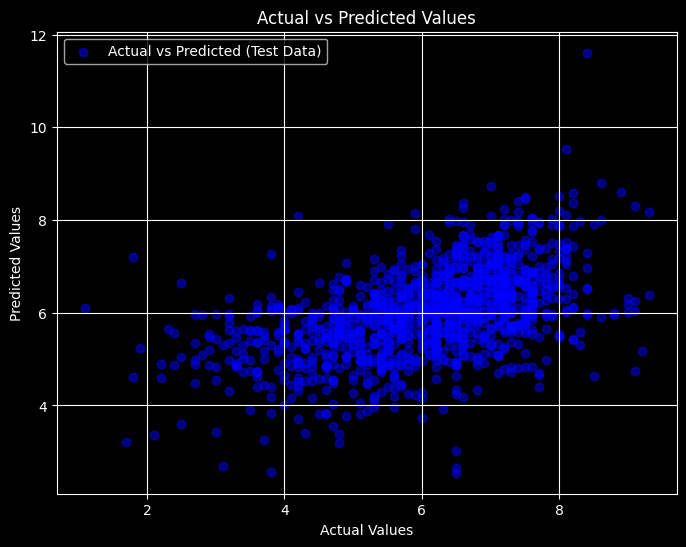

In [58]:
# Set the dark_background style
plt.style.use('dark_background')

# Create a scatter plot for the test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Summary of Model Performance
Based on the evaluation metrics calculated:

Mean Squared Error (MSE): 1.4877
Root Mean Squared Error (RMSE): 1.2197
Mean Absolute Error (MAE): 0.9479
R-squared (R2): 0.2004

The scatter plot above visually represents the model's performance by showing the relationship between the actual and predicted movie ratings on the test set. Ideally, the points would lie close to a diagonal line, indicating perfect predictions. The spread of the points around this hypothetical line shows the model's errors.

Further steps could involve:

Trying different regression models (e.g., RandomForestRegressor, GradientBoostingRegressor).
Performing more advanced feature engineering.
Hyperparameter tuning of the chosen model.